In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('ggplot')

import glob
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [2]:
groupA = [1, 3, 6, 7, 10, 11, 12]
groupB = [2, 4, 5, 8, 9, 13, 14]

events = [
    [5, 7, 33, 35, 37, 53, 56, 58, 60, 62],
    [3, 4, 5, 12, 14, 26, 28, 30, 32, 34, 36],
    [2, 4, 7, 9, 11, 13, 15, 17, 20, 24],
    [2, 3, 4, 13, 15, 35, 49, 52, 55, 57, 59],
    [2, 3, 4, 7, 9, 11, 13, 15, 17, 19, 22],
    [2, 4, 14, 16, 18, 20, 22, 24, 26, 28],
    [3, 24, 27, 29, 31, 33, 35, 37, 40, 42],
    [2, 3, 4, 6, 8, 10, 12, 14, 16, 18, 21],
    [3, 4, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    [3, 4, 11, 13, 15, 17, 19, 21, 23, 25],
    [2, 3, 5, 7, 9, 11, 13, 16, 18, 20],
    [2, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    [3, 4, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    [3, 4, 11, 13, 15, 17, 19, 21, 23, 25, 27]
]

scores = pd.read_csv("../Datafiles/scores.csv").values

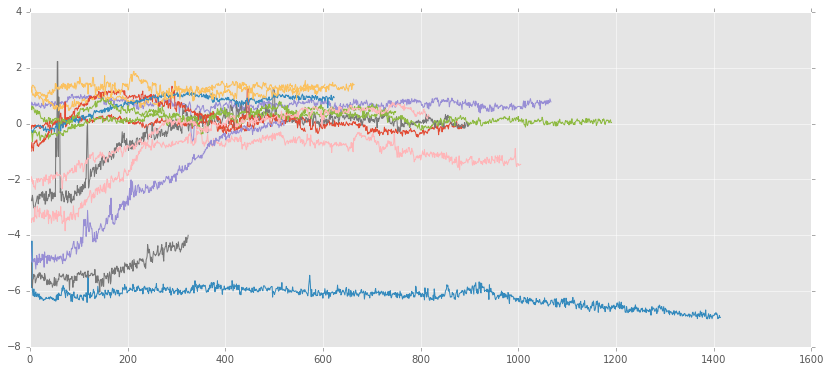

In [3]:
plt.figure(figsize=(14,6))

for p in range(1, 15):
    ir = pd.read_csv("../Datafiles/working/ir/" + "p" + str(p).zfill(2) + ".csv")
#     answers = scores[p-1][3:19:2]
#     confidences = scores[p-1][4:20:2]
    gaze = pd.read_csv("../Datafiles/working/gaze-abstime-raw/p" + str(p).zfill(2) + ".csv")
    
    begin_time = gaze[gaze["click_count"] == events[p-1][0]]["#timestamp"].values[0]
    end_time = gaze[gaze["click_count"] == events[p-1][-1]]["#timestamp"].values[0]
    
    nose_temperatures = ir[(ir["# timestamp"] > begin_time) & (ir["# timestamp"] < end_time)]["nose"].values
    face_temperatures = ir[(ir["# timestamp"] > begin_time) & (ir["# timestamp"] < end_time)]["face"].values
    plt.plot(nose_temperatures - face_temperatures)

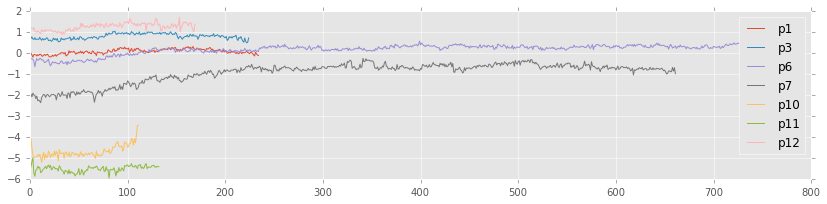

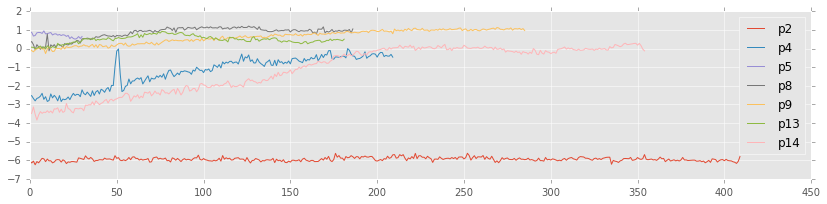

In [4]:
plt.figure(figsize=(14,3))
for p in groupA:
    ir = pd.read_csv("../Datafiles/working/ir/" + "p" + str(p).zfill(2) + ".csv")
    gaze = pd.read_csv("../Datafiles/working/gaze-abstime-raw/p" + str(p).zfill(2) + ".csv")
    
    begin_time = gaze[gaze["click_count"] == events[p-1][0]]["#timestamp"].values[0]
    end_time = gaze[gaze["click_count"] == events[p-1][1]]["#timestamp"].values[0]
    
    nose_temperatures = ir[(ir["# timestamp"] > begin_time) & (ir["# timestamp"] < end_time)]["nose"].values
    face_temperatures = ir[(ir["# timestamp"] > begin_time) & (ir["# timestamp"] < end_time)]["face"].values
    plt.plot(nose_temperatures - face_temperatures, label="p"+str(p))
plt.legend()
    
plt.figure(figsize=(14,3))
for p in groupB:
    ir = pd.read_csv("../Datafiles/working/ir/" + "p" + str(p).zfill(2) + ".csv")
    gaze = pd.read_csv("../Datafiles/working/gaze-abstime-raw/p" + str(p).zfill(2) + ".csv")
    
    begin_time = gaze[gaze["click_count"] == events[p-1][1]]["#timestamp"].values[0]
    end_time = gaze[gaze["click_count"] == events[p-1][2]]["#timestamp"].values[0]
    
    nose_temperatures = ir[(ir["# timestamp"] > begin_time) & (ir["# timestamp"] < end_time)]["nose"].values
    face_temperatures = ir[(ir["# timestamp"] > begin_time) & (ir["# timestamp"] < end_time)]["face"].values
    plt.plot(nose_temperatures - face_temperatures, label="p"+str(p))
plt.legend()

/Users/shoya/.pyenv/versions/2.7.11/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


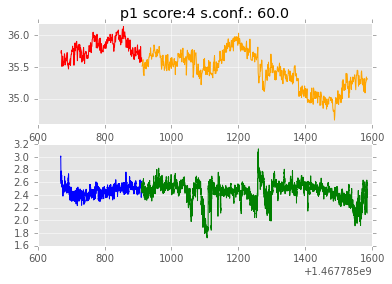

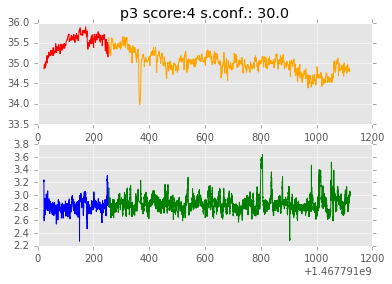

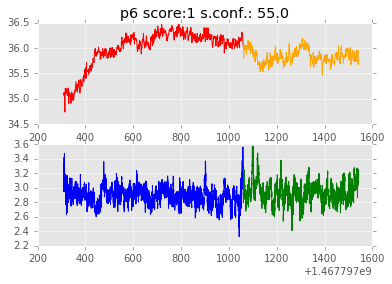

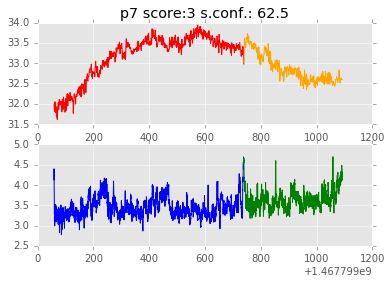

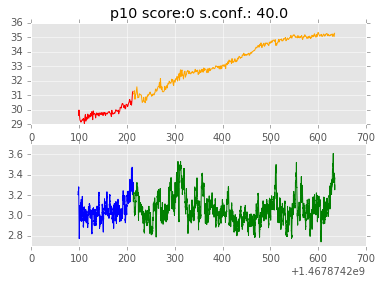

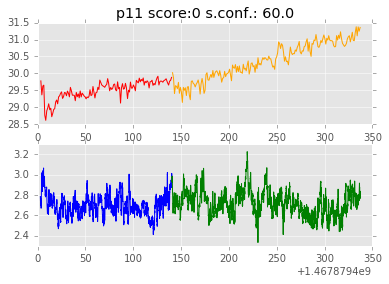

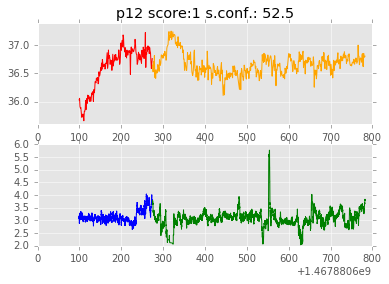

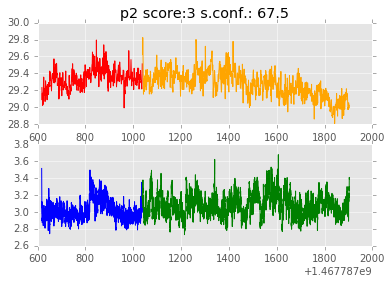

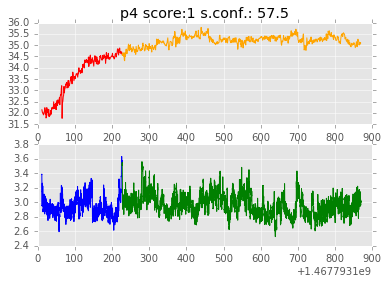

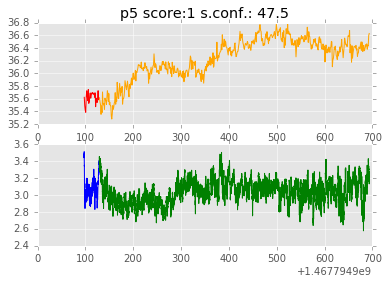

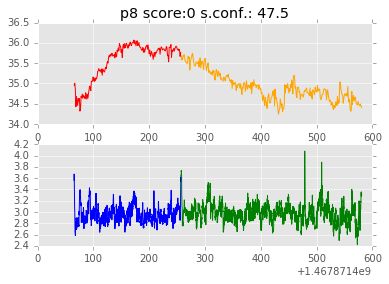

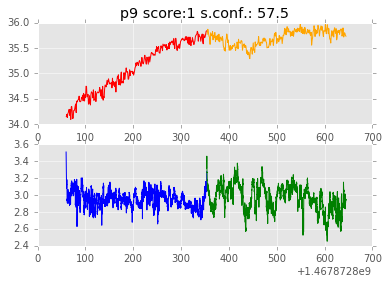

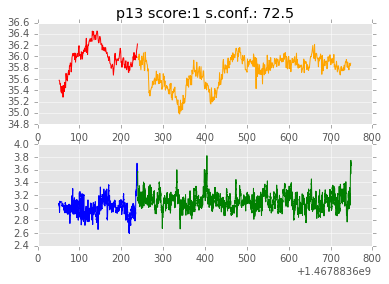

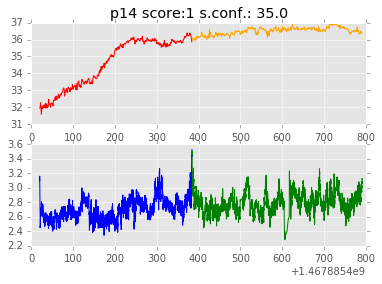

In [5]:
features = []

def coef(x, y):
    lr = LinearRegression()
    lr.fit(x.reshape(len(x), 1), y)
    return lr.coef_

def visualize(p, ir, gaze, begin_reading_time, begin_solving_time, end_time):
    ir_reading = ir[(ir["# timestamp"] > begin_reading_time) & (ir["# timestamp"] < begin_solving_time)]
    ir_solving = ir[(ir["# timestamp"] > begin_solving_time) & (ir["# timestamp"] < end_time)]
    gaze_reading = gaze[(gaze["#timestamp"] > begin_reading_time) & (gaze["#timestamp"] < begin_solving_time) & (gaze["left_pupil"] != 0)]
    gaze_solving = gaze[(gaze["#timestamp"] > begin_solving_time) & (gaze["#timestamp"] < end_time) & (gaze["left_pupil"] != 0)]

    answers = scores[p-1][3:19:2]
    confidences = scores[p-1][4:20:2]
    
    plt.figure()
    
    plt.subplot(2, 1, 1)
    plt.title("p"+str(p) + " score:" + str(np.sum(answers)) + " s.conf.: " + str(np.mean(confidences)))
    plt.plot(ir_reading["# timestamp"].values, ir_reading["nose"].values, c="red")
    plt.plot(ir_solving["# timestamp"].values, ir_solving["nose"].values, c="orange")

    plt.subplot(2, 1, 2)
    plt.plot(gaze_reading["#timestamp"].values, gaze_reading["left_pupil"].values, c="blue")
    plt.plot(gaze_solving["#timestamp"].values, gaze_solving["left_pupil"].values, c="green")    
    
    nose_reading_coef = coef(ir_reading["# timestamp"].values, ir_reading["nose"].values)[0]
    nose_solving_coef = coef(ir_solving["# timestamp"].values, ir_solving["nose"].values)[0]
    pupil_reading_coef = coef(gaze_reading["#timestamp"].values, gaze_reading["left_pupil"].values)[0]
    pupil_solving_coef = coef(gaze_solving["#timestamp"].values, gaze_solving["left_pupil"].values)[0]
    
    features.append(["P"+str(p), nose_reading_coef, nose_solving_coef])
    
for p in groupA:
    ir = pd.read_csv("../Datafiles/working/ir/" + "p" + str(p).zfill(2) + ".csv")
    gaze = pd.read_csv("../Datafiles/working/gaze-abstime-raw/p" + str(p).zfill(2) + ".csv")
    
    begin_reading_time = gaze[gaze["click_count"] == events[p-1][0]]["#timestamp"].values[0]
    begin_solving_time = gaze[gaze["click_count"] == events[p-1][1]]["#timestamp"].values[0]
    end_time = gaze[gaze["click_count"] == events[p-1][-1]]["#timestamp"].values[0]
    visualize(p, ir, gaze, begin_reading_time, begin_solving_time, end_time)
    
for p in groupB:
    ir = pd.read_csv("../Datafiles/working/ir/" + "p" + str(p).zfill(2) + ".csv")
    gaze = pd.read_csv("../Datafiles/working/gaze-abstime-raw/p" + str(p).zfill(2) + ".csv")
    
    begin_reading_time = gaze[gaze["click_count"] == events[p-1][1]]["#timestamp"].values[0]
    begin_solving_time = gaze[gaze["click_count"] == events[p-1][2]]["#timestamp"].values[0]
    end_time = gaze[gaze["click_count"] == events[p-1][-1]]["#timestamp"].values[0]
    visualize(p, ir, gaze, begin_reading_time, begin_solving_time, end_time)
    
df = pd.DataFrame(data=np.array(features), columns=["participant", "nose_reading_slope", "nose_solving_slope"])
df.to_csv("../Datafiles/working/general_features.csv", index=False)